In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
os.system('tar -zxf ../input/train.7z')

512

In [2]:
zero = '../input/train/audio/zero/'
random_zero = zero+os.listdir(zero)[0]
Audio(random_zero)

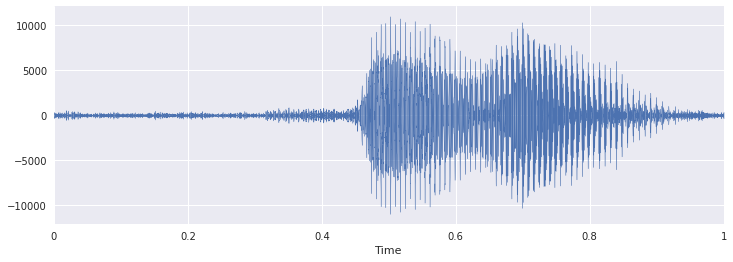

In [3]:
sample_rate, samples = scipy.io.wavfile.read(random_zero)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples, sr=sample_rate)
plt.show()

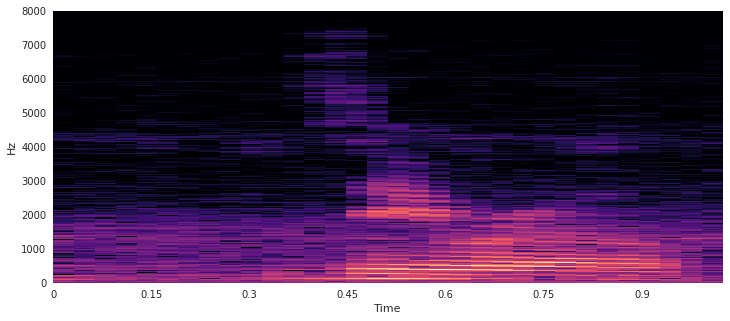

In [4]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

## Change pitch and speed

In [5]:
y_pitch_speed = samples.copy()
# you can change low and high here
length_change = np.random.uniform(low=0.5,high=1.5)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]
Audio(y_pitch_speed, rate=sample_rate)

resample length_change =  1.1620838509049245


## Change pitch only

In [6]:
y_pitch = samples.copy()
bins_per_octave = 24
pitch_pm = 4
pitch_change =  pitch_pm * 2*(np.random.uniform()-0.5)   
print("pitch_change = ",pitch_change)
y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
Audio(y_pitch, rate=sample_rate)

pitch_change =  3.2929794749025545


## Change speed only

In [7]:
y_speed = samples.copy()
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)
tmp = librosa.effects.time_stretch(y_speed.astype('float64'), speed_change)
minlen = min(y_speed.shape[0], tmp.shape[0])
y_speed *= 0 
y_speed[0:minlen] = tmp[0:minlen]
Audio(y_speed, rate=sample_rate)

speed_change =  1.087354183140117


## value augmentation

In [8]:
y_aug = samples.copy()
dyn_change = np.random.uniform(low=0.5,high=1.1)
print("dyn_change = ",dyn_change)
y_aug = y_aug.astype('float64') * dyn_change
print(y_aug[:50])
print(samples[:50])
Audio(y_aug, rate=sample_rate)

dyn_change =  0.5261285612764037
[-121.00956909 -147.84212572 -177.30532515 -180.98822508 -160.46921119
 -144.15922579 -114.69602636  -84.1805698   -69.97509865  -64.71381304
  -89.44185542 -111.53925499 -109.96086931 -116.27441204 -108.90861218
  -85.23282693  -66.81832728  -54.71737037  -54.19124181  -41.56415634
  -34.72448504  -14.73159972   25.25417094   35.77674217    7.89192842
  -49.45608476  -85.23282693 -125.21859758 -142.05471154 -116.27441204
  -80.49766988  -26.30642806    5.26128561   42.0902849    61.03091311
   41.03802778   12.10095691  -21.57127101  -49.98221332  -95.75539815
 -117.32666916 -106.80409794  -92.59862678  -62.60929879   -8.94418554
   42.0902849    61.03091311   67.8705844    65.76607016   56.29575606]
[-230 -281 -337 -344 -305 -274 -218 -160 -133 -123 -170 -212 -209 -221 -207
 -162 -127 -104 -103  -79  -66  -28   48   68   15  -94 -162 -238 -270 -221
 -153  -50   10   80  116   78   23  -41  -95 -182 -223 -203 -176 -119  -17
   80  116  129  125  107]


## add distribution noise

In [9]:
y_noise = samples.copy()
# you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
Audio(y_noise, rate=sample_rate)

## random shifting

In [10]:
y_shift = samples.copy()
timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
Audio(y_shift, rate=sample_rate)

timeshift_fac =  -0.1418153487359346
-2269


## apply hpss

In [11]:
y_hpss = librosa.effects.hpss(samples.astype('float64'))
print(y_hpss[1][:10])
print(samples[:10])
Audio(y_hpss[1], rate=sample_rate)

[-68.84569702 -85.26607253 -97.03498174 -91.19389989 -67.34098501
 -49.59415307 -26.17522263  -7.35533671   1.80688166   4.51863084]
[-230 -281 -337 -344 -305 -274 -218 -160 -133 -123]


## Shift silent to the right

In [12]:
sampling=samples[(samples > 200) | (samples < -200)]
shifted_silent =sampling.tolist()+np.zeros((samples.shape[0]-sampling.shape[0])).tolist()
Audio(shifted_silent, rate=sample_rate)

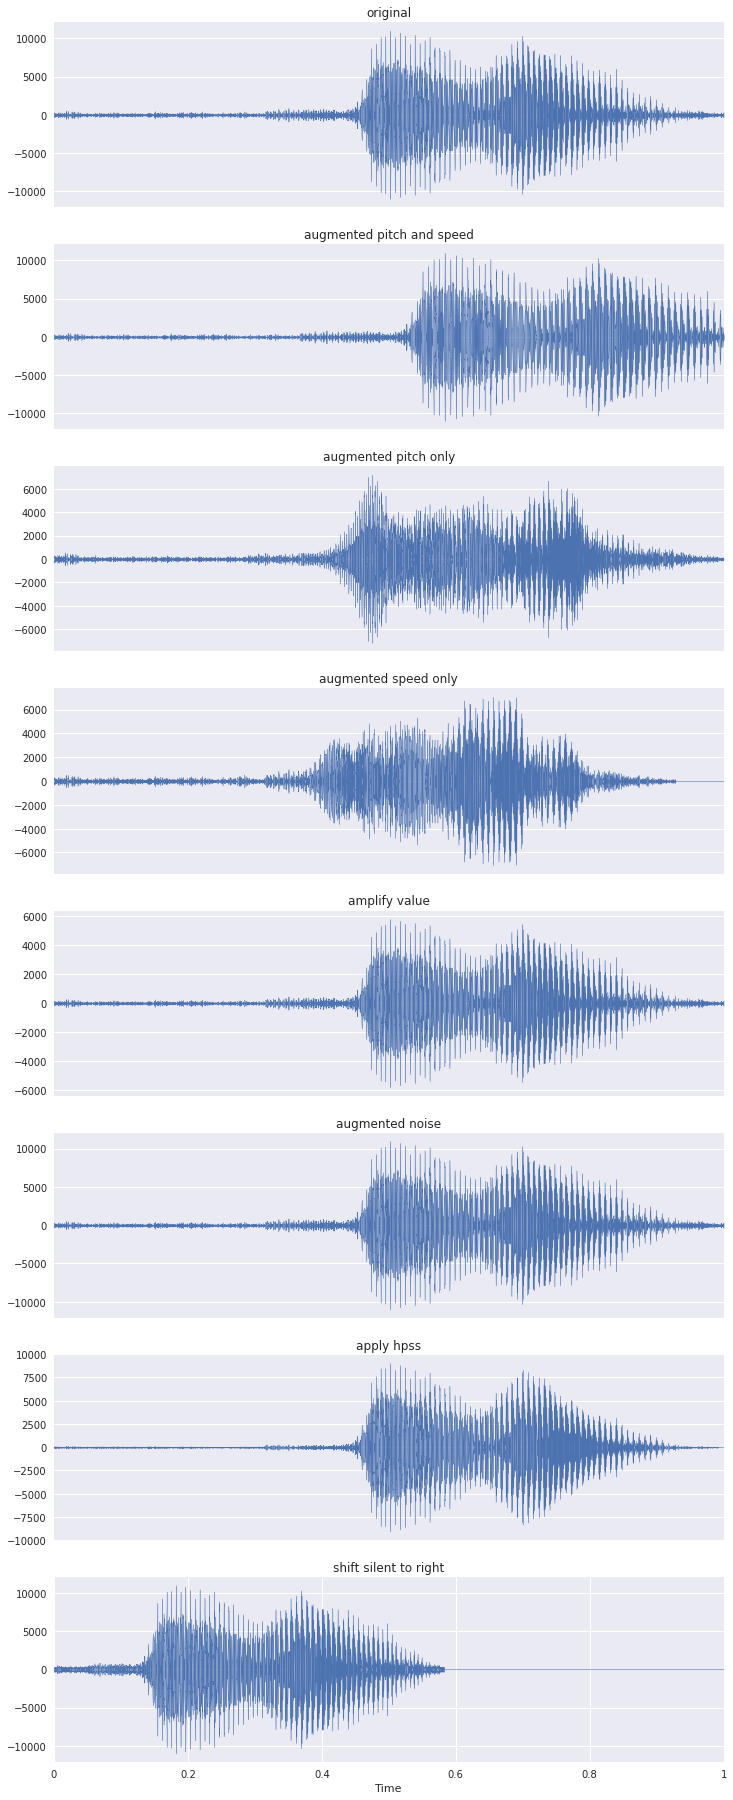

In [13]:
plt.figure(figsize=(12, 4*8))
plt.subplot(8, 1, 1)
librosa.display.waveplot(samples, sr=sample_rate,x_axis=None)
plt.title('original')
plt.subplot(8, 1, 2)
librosa.display.waveplot(y_pitch_speed, sr=sample_rate,x_axis=None)
plt.title('augmented pitch and speed')
plt.subplot(8, 1, 3)
librosa.display.waveplot(y_pitch, sr=sample_rate,x_axis=None)
plt.title('augmented pitch only')
plt.subplot(8, 1, 4)
librosa.display.waveplot(y_speed, sr=sample_rate,x_axis=None)
plt.title('augmented speed only')
plt.subplot(8, 1, 5)
librosa.display.waveplot(y_aug, sr=sample_rate,x_axis=None)
plt.title('amplify value')
plt.subplot(8, 1, 6)
librosa.display.waveplot(y_noise, sr=sample_rate,x_axis=None)
plt.title('augmented noise')
plt.subplot(8, 1, 7)
librosa.display.waveplot(y_hpss[1], sr=sample_rate,x_axis=None)
plt.title('apply hpss')
plt.subplot(8, 1, 8)
librosa.display.waveplot(np.array(shifted_silent), sr=sample_rate)
plt.title('shift silent to right')
plt.show()